In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import fetch_openml #이미지 데이터셋 (손글씨)
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 이미지 분류
import tensorflow as tf


import warnings
warnings.simplefilter('ignore')

In [2]:
data_generator = ImageDataGenerator(rescale=1./255)

# class_mode='sparse' => onehot으로 하지않고 라벨링으로
traingen = data_generator.flow_from_directory('myimg', target_size =(98,98), class_mode='sparse', seed=1)

Found 32 images belonging to 2 classes.


In [3]:
# 데이터개수가 32개로 학습용으로 상당히 부족함

In [4]:
# 랜덤하게 이미지를 가져옴
x_data, y_data = traingen.next()

In [5]:
# 강아지 이미지 16개, 고양이 이미지 16개
# (32, 98, 98, 3) 32개의 이미지를 98x98로 RGB색상(3)
x_data.shape, y_data.shape

((32, 98, 98, 3), (32,))

In [6]:
y_data

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

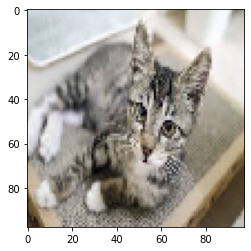

In [7]:
# 강아지 (1), 고양이 (0)
plt.imshow(x_data[15])
plt.show()

In [8]:
x_reshape = x_data.reshape(32,-1)
x_reshape.shape

(32, 28812)

In [9]:
model = MLPClassifier(verbose=1)
model.fit(x_reshape, y_data)

Iteration 1, loss = 0.84443503
Iteration 2, loss = 32.48735774
Iteration 3, loss = 11.40872558
Iteration 4, loss = 6.76982243
Iteration 5, loss = 8.14841605
Iteration 6, loss = 7.50756683
Iteration 7, loss = 6.12564047
Iteration 8, loss = 4.25307509
Iteration 9, loss = 2.06693820
Iteration 10, loss = 0.64580305
Iteration 11, loss = 2.24101761
Iteration 12, loss = 3.20189524
Iteration 13, loss = 3.43324346
Iteration 14, loss = 3.08630217
Iteration 15, loss = 2.26093503
Iteration 16, loss = 1.13232006
Iteration 17, loss = 0.57068655
Iteration 18, loss = 1.29675334
Iteration 19, loss = 1.85028282
Iteration 20, loss = 1.95576298
Iteration 21, loss = 1.65830227
Iteration 22, loss = 1.75514197
Iteration 23, loss = 0.51656018
Iteration 24, loss = 0.74758318
Iteration 25, loss = 1.20867855
Iteration 26, loss = 1.35207519
Iteration 27, loss = 1.14174089
Iteration 28, loss = 0.71474084
Iteration 29, loss = 0.45731041
Iteration 30, loss = 0.64842498
Iteration 31, loss = 0.89194206
Iteration 32, l

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [10]:
model.score(x_reshape, y_data)

1.0

In [11]:
model.predict([x_reshape[15]])

array([0.], dtype=float32)

In [20]:
x_reshape.shape

(32, 28812)

## 다른 이미지 확인해보기


In [12]:
from tensorflow.keras.preprocessing import image

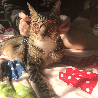

In [13]:
cat_image = image.load_img('image/cat5.jpeg', target_size=(98,98))
cat_image

In [22]:
testimg =image.img_to_array(cat_image)/255
testimg.shape
#

(98, 98, 3)

In [24]:
testimg.reshape(1,-1).size

28812

In [16]:
model.predict(testimg.reshape(1,-1))

array([1.], dtype=float32)

## 모델 저장

In [17]:
from sklearn.externals import joblib

In [18]:
joblib.dump(model, 'catdog.pkl')

['catdog.pkl']

## 모델 읽기

In [19]:
mymodel = joblib.load('catdog.pkl')
mymodel.predict(testimg.reshape(1,-1))


array([1.], dtype=float32)